# Fit spline

In [1]:
import numpy as np
from spline_interpolations import *
import cv2
from matplotlib import pyplot as plt
from typing import *


Point2D = np.ndarray # shape = (1, 2)
PointsArray = np.ndarray # Liste de points, shape = [n, 2]
FunctionDoubleToPoint = Callable[[float], Point2D] # une fonction float -> Point2D
InterpolationFunction = Callable[[PointsArray], PointsArray] # une fonction PointsArray-> PointsArray

# Utilitaires
On définit des fonctions de dessin de splines interpolees avec leur point de controle:

In [2]:
def plot_pixels_array(ax, points: PointsArray, style):
    x = points[:,0]
    y = points[:,1] * -1
    ax.plot(x, y, style) 

    
def plot_control_and_interpolate(control_points: PointsArray, interpolated_points: PointsArray, title:str = ""):
    fig, ax = plt.subplots(1, 1) 
    plot_pixels_array(ax, control_points, 'or')
    plot_pixels_array(ax, interpolated_points, '-b')
    fig.suptitle(title)

def plot_curve(curve: PointsArray, title:str = ""):
    fig, ax = plt.subplots(1, 1) 
    plot_pixels_array(ax, curve, '-b')
    fig.suptitle(title)    

# Fonctions d'interpolation de splines
On dispose de deux fonctions d'interpolation, `interpolate_centripetal_catmull_rom_circular_shape` et `interpolate_pascal_spline_circular_shape` qui permettent d'interpoler des points de controle vers une form circulaire "douce".

Par exemple, étant donné les points:

In [3]:
control_points = np.array(
        [
            [0., 0.],
            [1., 0.],
            [1., 1.],
            [0., 1.],
        ]
    )

On peut avoir les interpolées ci-dessous:

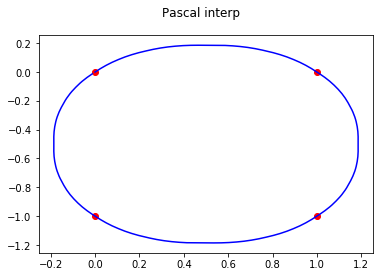

In [4]:
nb_points_to_interpolate = 200
alpha = 0.4
interpolated_points = interpolate_pascal_spline_circular_shape(control_points, nb_points_to_interpolate, alpha)
plot_control_and_interpolate(control_points, interpolated_points, "Pascal interp")

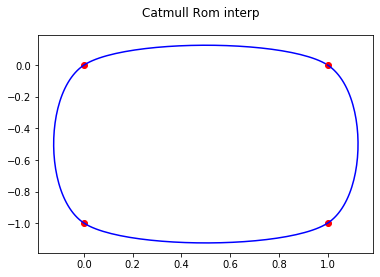

In [5]:
nb_points_to_interpolate = 200
alpha = 0.4
interpolated_points = interpolate_centripetal_catmull_rom_circular_shape(control_points, nb_points_to_interpolate, alpha)
plot_control_and_interpolate(control_points, interpolated_points, "Catmull Rom interp")

# Collection de formes

On dispose de plusieurs formes typiques:


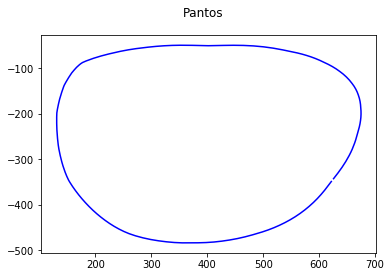

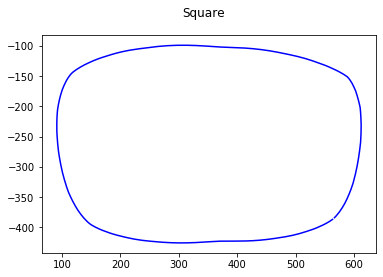

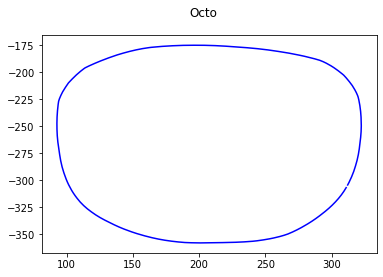

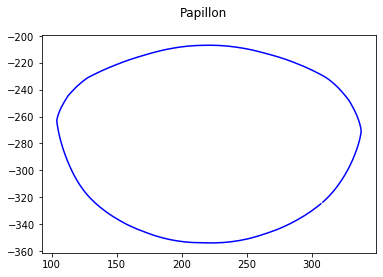

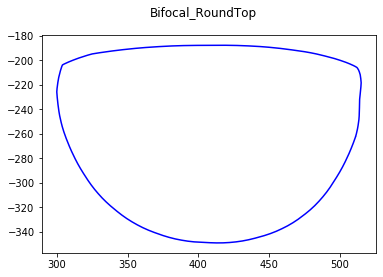

In [6]:
for shape_name, curve in typical_shapes().items():
    plot_curve(curve, shape_name)

# Le problème: fitspline

On cherche les fonctions inverses (appelée `fit_spline_*`) qui permettent, étant donnée une courbe avec beaucoup de points (les courbes en bleu ci-dessus) de trouver un bon ensemble de points de contrôle permettant d'approximer la courbe avec une de ces deux méthodes d'interpolation.

Leur signature doit être:

In [96]:
def fit_spline_pascal(
    curve: PointsArray,
    nbControlPoints: int,
    alpha: float
  ) -> PointsArray:

    """ 
    fit_spline_pascal renvoie nb_control_points permettant d'approximer la courbe 
    avec l'interpolation interpolate_pascal_spline_circular_shape
    """
    pass


def fit_spline_catmull_rom(
     curve: PointsArray,
    nbControlPoints: int,
    alpha: float
  ) -> PointsArray:
    """idem avec interpolate_centripetal_catmull_rom_circular_shape"""

    